### Goal of Model:

### To reveal the behavioural segments of credit card holders

### Import Library

In [131]:
#Basic python library which need to import
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sn
%matplotlib inline

#Library for statistics operation
import scipy.stats as stats

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

<IPython.core.display.Javascript object>

### Load data

In [132]:
os.chdir('D:\Data Science\Project 1')

In [133]:
os.getcwd()

'D:\\Data Science\\Project 1'

In [134]:
# reading data into dataframe
credit= pd.read_csv("credit-card-data.csv")

### Information about data set

In [135]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [136]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [137]:
credit['CASH_ADVANCE_TRX'] = credit['CASH_ADVANCE_TRX'].astype(float)
credit['PURCHASES_TRX'] = credit['PURCHASES_TRX'].astype(float)
credit['TENURE'] = credit['TENURE'].astype(float)

In [138]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   float64
 12  PURCHA

In [139]:
credit.shape

(8950, 18)

In [140]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


---

### A) Missing Value Treatment
       - Since there are missing values in the data so we are imputing them with median.

---

In [141]:
credit.isnull().values.sum()

314

In [142]:
credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [143]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(credit.isnull().sum())
missing_val

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [144]:
#Reset index
missing_val = missing_val.reset_index()
missing_val

,index,0
0,CUST_ID,0
1,BALANCE,0
2,BALANCE_FREQUENCY,0
3,PURCHASES,0
4,ONEOFF_PURCHASES,0
5,INSTALLMENTS_PURCHASES,0
6,CASH_ADVANCE,0
7,PURCHASES_FREQUENCY,0
8,ONEOFF_PURCHASES_FREQUENCY,0
9,PURCHASES_INSTALLMENTS_FREQUENCY,0


In [145]:
#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_val

,Variables,Missing_percentage
0,CUST_ID,0
1,BALANCE,0
2,BALANCE_FREQUENCY,0
3,PURCHASES,0
4,ONEOFF_PURCHASES,0
5,INSTALLMENTS_PURCHASES,0
6,CASH_ADVANCE,0
7,PURCHASES_FREQUENCY,0
8,ONEOFF_PURCHASES_FREQUENCY,0
9,PURCHASES_INSTALLMENTS_FREQUENCY,0


In [146]:
#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(credit))*100
missing_val

,Variables,Missing_percentage
0,CUST_ID,0.000000
1,BALANCE,0.000000
2,BALANCE_FREQUENCY,0.000000
3,PURCHASES,0.000000
4,ONEOFF_PURCHASES,0.000000
5,INSTALLMENTS_PURCHASES,0.000000
6,CASH_ADVANCE,0.000000
7,PURCHASES_FREQUENCY,0.000000
8,ONEOFF_PURCHASES_FREQUENCY,0.000000
9,PURCHASES_INSTALLMENTS_FREQUENCY,0.000000


In [147]:
#Descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,Variables,Missing_percentage
0,MINIMUM_PAYMENTS,3.497207
1,CREDIT_LIMIT,0.011173
2,CUST_ID,0.000000
3,BALANCE,0.000000
4,PRC_FULL_PAYMENT,0.000000
5,PAYMENTS,0.000000
6,PURCHASES_TRX,0.000000
7,CASH_ADVANCE_TRX,0.000000
8,CASH_ADVANCE_FREQUENCY,0.000000
9,PURCHASES_INSTALLMENTS_FREQUENCY,0.000000


In [148]:
#Save output results 
missing_val.to_csv("Miising_perc.csv", index = False)

In [149]:
#Impute with median
credit['MINIMUM_PAYMENTS'] = credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].median())
credit['CREDIT_LIMIT'] = credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].median())

In [150]:
# Now again check the missing values.

credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

### Deriving New KPI

***1. Monthly average purchase and cash advance amount***

#### MONTHLY_AVG_PURCHASE

In [151]:
credit['MONTHLY_AVG_PURCHASE']=credit['PURCHASES']/credit['TENURE']

In [152]:
print( credit['PURCHASES'],'\n',
       credit['TENURE'],'\n',
       credit['MONTHLY_AVG_PURCHASE'].head() )

0         95.40
1          0.00
2        773.17
3       1499.00
4         16.00
         ...   
8945     291.12
8946     300.00
8947     144.40
8948       0.00
8949    1093.25
Name: PURCHASES, Length: 8950, dtype: float64 
 0       12.0
1       12.0
2       12.0
3       12.0
4       12.0
        ... 
8945     6.0
8946     6.0
8947     6.0
8948     6.0
8949     6.0
Name: TENURE, Length: 8950, dtype: float64 
 0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: MONTHLY_AVG_PURCHASE, dtype: float64


#### MONTHLY_CASH_ADVANCE AMOUNT

In [153]:
credit['MONTHLY_CASH_ADVANCE']=credit['CASH_ADVANCE']/credit['TENURE']

In [154]:
print( credit['CASH_ADVANCE'],'\n',
       credit['TENURE'],'\n',
       credit['MONTHLY_CASH_ADVANCE'].head() )

0          0.000000
1       6442.945483
2          0.000000
3        205.788017
4          0.000000
           ...     
8945       0.000000
8946       0.000000
8947       0.000000
8948      36.558778
8949     127.040008
Name: CASH_ADVANCE, Length: 8950, dtype: float64 
 0       12.0
1       12.0
2       12.0
3       12.0
4       12.0
        ... 
8945     6.0
8946     6.0
8947     6.0
8948     6.0
8949     6.0
Name: TENURE, Length: 8950, dtype: float64 
 0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: MONTHLY_CASH_ADVANCE, dtype: float64


In [155]:
credit['MONTHLY_CASH_ADVANCE'].isnull().any()

False

#### 2- Purchases by type (one-off, installments)

- To find what type of purchases customers are making on credit card

In [156]:
credit.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


###### Find customers ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES details

In [157]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [158]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [159]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [160]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

***As per above detail we found out that there are 4 types of purchase behaviour in the data set. So we need to derive a categorical variable based on their behaviour***

In [161]:
def purchase(credit):
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'NONE'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'BOTH_ONEOFF_INSTALLMENTS'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'ONEOFF'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'INSTALLMENTS'

In [162]:
credit['PURCHASE_TYPE']=credit.apply(purchase,axis=1)

In [163]:
credit['PURCHASE_TYPE'].value_counts()

BOTH_ONEOFF_INSTALLMENTS    2774
INSTALLMENTS                2260
NONE                        2042
ONEOFF                      1874
Name: PURCHASE_TYPE, dtype: int64

In [164]:
credit['PURCHASE_TYPE'].isnull().any()

False

#### 4. Limit_usage (balance to credit limit ratio ) credit card utilization
   - Lower value implies cutomers are maintaing thier balance properly. Lower value means good credit score

In [165]:
credit['LIMIT_USAGE']=credit.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [166]:
print( credit['BALANCE'],'\n',
       credit['CREDIT_LIMIT'],'\n',
       credit['LIMIT_USAGE'].head() )

0         40.900749
1       3202.467416
2       2495.148862
3       1666.670542
4        817.714335
           ...     
8945      28.493517
8946      19.183215
8947      23.398673
8948      13.457564
8949     372.708075
Name: BALANCE, Length: 8950, dtype: float64 
 0       1000.0
1       7000.0
2       7500.0
3       7500.0
4       1200.0
         ...  
8945    1000.0
8946    1000.0
8947    1000.0
8948     500.0
8949    1200.0
Name: CREDIT_LIMIT, Length: 8950, dtype: float64 
 0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: LIMIT_USAGE, dtype: float64


In [167]:
credit['LIMIT_USAGE'].isnull().any()

False

#### 5- Payments to minimum payments ratio etc.

In [168]:
credit['PAYMENT_MINPAY']=credit.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

In [169]:
print( credit['PAYMENTS'],'\n',
       credit['MINIMUM_PAYMENTS'],'\n',
       credit['PAYMENT_MINPAY'].head() )

0        201.802084
1       4103.032597
2        622.066742
3          0.000000
4        678.334763
           ...     
8945     325.594462
8946     275.861322
8947      81.270775
8948      52.549959
8949      63.165404
Name: PAYMENTS, Length: 8950, dtype: float64 
 0        139.509787
1       1072.340217
2        627.284787
3        312.343947
4        244.791237
           ...     
8945      48.886365
8946     312.343947
8947      82.418369
8948      55.755628
8949      88.288956
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: float64 
 0    1.446508
1    3.826241
2    0.991682
3    0.000000
4    2.771075
Name: PAYMENT_MINPAY, dtype: float64


In [170]:
credit['PAYMENT_MINPAY'].isnull().any()

False

In [171]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   float64
 12  PURCHA

#### Extreme value Treatment
- Since there are variables having extreme values so I am doing log-transformation on the dataset to remove outlier effect 

In [172]:
# log tranformation
cr_log=credit.drop(['CUST_ID','PURCHASE_TYPE'],axis=1).applymap(lambda x: np.log(x+1))
##https://medium.com/@evelynli_30748/map-apply-applymap-with-the-lambda-function-5e83028be759
##Return the natural logarithm of one plus the input array, element-wise.-log(x+1)

In [173]:
cr_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PAYMENT_MINPAY
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [174]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]] 

In [175]:
cr_pre.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'MONTHLY_AVG_PURCHASE',
       'MONTHLY_CASH_ADVANCE', 'LIMIT_USAGE', 'PAYMENT_MINPAY'],
      dtype='object')

In [176]:
cr_log.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'MONTHLY_AVG_PURCHASE', 'MONTHLY_CASH_ADVANCE', 'LIMIT_USAGE',
       'PAYMENT_MINPAY'],
      dtype='object')

-------------------------------------------------------------------------------------------------------------------------------




### Insights from KPIs

In [177]:
#Average payment_minpayment ratio for each purchse type.
x=credit.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['PAYMENT_MINPAY']))
type(x)
x.values

array([ 7.237, 13.259, 10.087,  5.571])

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

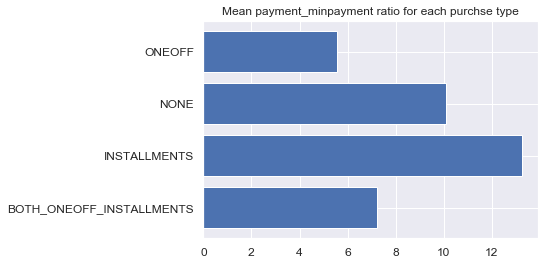

In [178]:
#plt.barh(left=np.arange(len(x)),bottom=x.values)
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')

In [179]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PAYMENT_MINPAY
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318,86.175173,88.977984,0.388884,9.059164
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331,180.508787,193.136115,0.389722,118.180526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,3.399375,0.000000,0.041494,0.913275
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,31.936667,0.000000,0.302720,2.032717
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000,97.228333,99.085196,0.717571,6.052729
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4086.630833,3928.100980,15.909951,6840.528861


###### Insight 1: Customers With Installment Purchases are Paying Dues

In [180]:
credit[credit['PURCHASE_TYPE']=='n']

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,PURCHASE_TYPE,LIMIT_USAGE,PAYMENT_MINPAY


Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

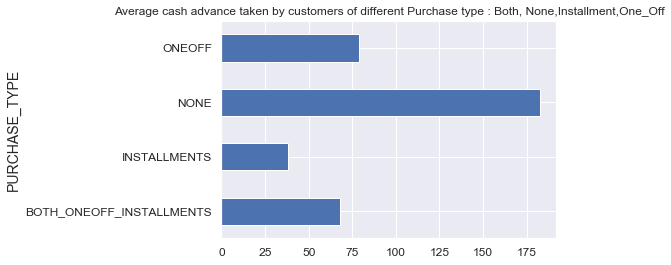

In [181]:
credit.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['MONTHLY_CASH_ADVANCE'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

#### Insight 2: Customers who don't do either one-off or installment purchases take more cash on advance.

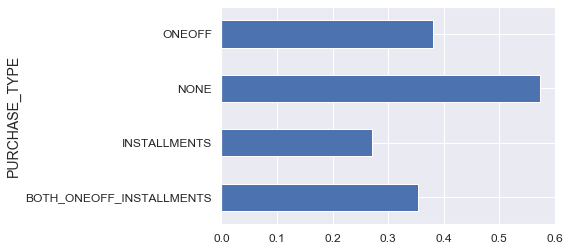

In [182]:
credit.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['LIMIT_USAGE'])).plot.barh()

##### Insight 3: Customers with installment purchases have good credit score

In [183]:
#Original dataset with categorical column converted to number type.
cre_original=pd.concat([credit,pd.get_dummies(credit['PURCHASE_TYPE'])],axis=1)

In [184]:
cre_original

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,PURCHASE_TYPE,LIMIT_USAGE,PAYMENT_MINPAY,BOTH_ONEOFF_INSTALLMENTS,INSTALLMENTS,NONE,ONEOFF
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,7.950000,0.000000,INSTALLMENTS,0.040901,1.446508,0,1,0,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.000000,536.912124,NONE,0.457495,3.826241,0,0,1,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,64.430833,0.000000,ONEOFF,0.332687,0.991682,0,0,0,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,124.916667,17.149001,ONEOFF,0.222223,0.000000,0,0,0,1
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.333333,0.000000,ONEOFF,0.681429,2.771075,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,6.0,48.520000,0.000000,INSTALLMENTS,0.028494,6.660231,0,1,0,0
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,312.343947,0.000000,6.0,50.000000,0.000000,INSTALLMENTS,0.019183,0.883197,0,1,0,0
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6.0,24.066667,0.000000,INSTALLMENTS,0.023399,0.986076,0,1,0,0
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6.0,0.000000,6.093130,NONE,0.026915,0.942505,0,0,1,0


### Preparing Machine learning algorithm

***We do have some categorical data which need to convert with the help of dummy creation***

In [185]:
# creating Dummies for categorical variable
cr_pre['PURCHASE_TYPE']=credit.loc[:,'PURCHASE_TYPE']
pd.get_dummies(cr_pre['PURCHASE_TYPE'])

,BOTH_ONEOFF_INSTALLMENTS,INSTALLMENTS,NONE,ONEOFF
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8945,0,1,0,0
8946,0,1,0,0
8947,0,1,0,0
8948,0,0,1,0


#### Now merge the created dummy with the original data frame

In [186]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['PURCHASE_TYPE'])],axis=1)

In [187]:
l=['PURCHASE_TYPE']

In [188]:
cr_dummy=cr_dummy.drop(l,axis=1)
cr_dummy.isnull().sum()

BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
MONTHLY_AVG_PURCHASE                0
MONTHLY_CASH_ADVANCE                0
LIMIT_USAGE                         0
PAYMENT_MINPAY                      0
BOTH_ONEOFF_INSTALLMENTS            0
INSTALLMENTS                        0
NONE                                0
ONEOFF                              0
dtype: int64

In [189]:
cr_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE_FREQUENCY                 8950 non-null   float64
 1   ONEOFF_PURCHASES                  8950 non-null   float64
 2   INSTALLMENTS_PURCHASES            8950 non-null   float64
 3   PURCHASES_FREQUENCY               8950 non-null   float64
 4   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 5   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 6   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 7   CASH_ADVANCE_TRX                  8950 non-null   float64
 8   PURCHASES_TRX                     8950 non-null   float64
 9   MONTHLY_AVG_PURCHASE              8950 non-null   float64
 10  MONTHLY_CASH_ADVANCE              8950 non-null   float64
 11  LIMIT_USAGE                       8950 non-null   float64
 12  PAYMEN

In [190]:
cr_dummy.head(3)

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PAYMENT_MINPAY,BOTH_ONEOFF_INSTALLMENTS,INSTALLMENTS,NONE,ONEOFF
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,0,0,1


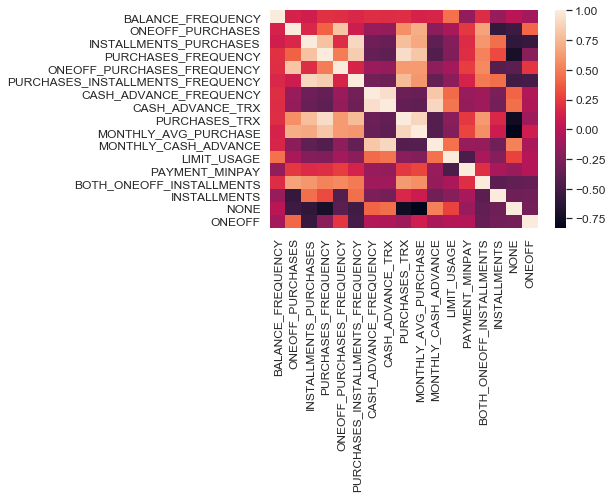

In [191]:
sns.heatmap(cr_dummy.corr())

<big>
- Heat map shows that many features are co-related so applying dimensionality reduction will help negating multi-colinearity in data
</big>


- Before applying PCA we will standardize data  to avoid effect of scale on our result. Centering and Scaling will make all features with equal weight.

### Standardrizing data 
- To put data on the same scale 

In [192]:
from sklearn.preprocessing import  StandardScaler

In [193]:
sc=StandardScaler()

In [194]:
cr_dummy.shape

(8950, 17)

In [195]:
cr_scaled=sc.fit_transform(cr_dummy)

In [196]:
cr_scaled

array([[-1.488e-01, -9.871e-01,  3.945e-01, -7.469e-01, -7.325e-01,
        -6.743e-01, -7.244e-01, -8.101e-01, -5.795e-01, -4.290e-01,
        -8.907e-01, -1.023e+00, -4.924e-01, -6.702e-01,  1.721e+00,
        -5.437e-01, -5.146e-01],
       [ 1.796e-01, -9.871e-01, -1.087e+00, -1.303e+00, -7.325e-01,
        -9.583e-01,  6.996e-01,  7.846e-01, -1.379e+00, -1.523e+00,
         1.697e+00,  3.222e-01,  2.303e-01, -6.702e-01, -5.812e-01,
         1.839e+00, -5.146e-01],
       [ 4.927e-01,  1.062e+00, -1.087e+00,  1.197e+00,  2.467e+00,
        -9.583e-01, -7.244e-01, -8.101e-01,  4.879e-01,  5.643e-01,
        -8.907e-01, -3.550e-02, -7.112e-01, -6.702e-01, -5.812e-01,
        -5.437e-01,  1.943e+00],
       [-8.579e-01,  1.266e+00, -1.087e+00, -1.014e+00, -3.630e-01,
        -9.583e-01, -2.136e-01, -1.233e-01, -8.747e-01,  8.912e-01,
         3.024e-01, -3.812e-01, -1.444e+00, -6.702e-01, -5.812e-01,
        -5.437e-01,  1.943e+00],
       [ 4.927e-01, -1.143e-01, -1.087e+00, -1.014e+

### Applying PCA

**With the help of principal component analysis we will reduce features**

In [197]:
from sklearn.decomposition import PCA

In [198]:
cr_dummy.shape

(8950, 17)

In [199]:
#We have 17 features.so we want to reduce the dimension
pc=PCA(n_components=17)
cr_pca=pc.fit(cr_scaled)

In [200]:
#Lets check if we will take 17 component then how much varience it explain. Ideally it should be 1 i.e 100%
sum(cr_pca.explained_variance_ratio_)

0.9999999999999999

In [201]:
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [202]:
var_ratio

{2: 0.5826439793960281,
 3: 0.7299379309512698,
 4: 0.8115442762351263,
 5: 0.8770555795291431,
 6: 0.9186492443512612,
 7: 0.941092525603013,
 8: 0.9616114053683071,
 9: 0.9739787081990646,
 10: 0.9835896584630708,
 11: 0.9897248107341953,
 12: 0.9927550009135226,
 13: 0.9953907562385429,
 14: 0.9979616898169593,
 15: 0.9996360473172954,
 16: 0.9999999999999999,
 17: 0.9999999999999999}

***Since 6 components are explaining about 90% variance so we select 6 components***

In [203]:
pc=PCA(n_components=6)

In [204]:
p=pc.fit(cr_scaled)

In [205]:
cr_scaled.shape

(8950, 17)

In [206]:
p.explained_variance_

array([6.836, 3.07 , 2.504, 1.387, 1.114, 0.707])

In [207]:
np.sum(p.explained_variance_)

15.618782269308792

In [208]:
var_ratio

{2: 0.5826439793960281,
 3: 0.7299379309512698,
 4: 0.8115442762351263,
 5: 0.8770555795291431,
 6: 0.9186492443512612,
 7: 0.941092525603013,
 8: 0.9616114053683071,
 9: 0.9739787081990646,
 10: 0.9835896584630708,
 11: 0.9897248107341953,
 12: 0.9927550009135226,
 13: 0.9953907562385429,
 14: 0.9979616898169593,
 15: 0.9996360473172954,
 16: 0.9999999999999999,
 17: 0.9999999999999999}

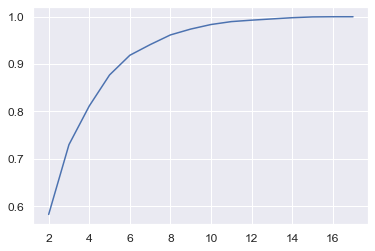

In [209]:
pd.Series(var_ratio).plot()

In [210]:
cr_scaled.shape

(8950, 17)

In [211]:
pc_final=PCA(n_components=6).fit(cr_scaled)

reduced_cr=pc_final.fit_transform(cr_scaled)

In [212]:
dd=pd.DataFrame(reduced_cr)

In [213]:
dd.head()

,0,1,2,3,4,5
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214


***So initially we had 17 variables now its 6 so our variable go reduced***

In [214]:
dd.shape

(8950, 6)

In [215]:
col_list=cr_dummy.columns

In [216]:
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'MONTHLY_AVG_PURCHASE',
       'MONTHLY_CASH_ADVANCE', 'LIMIT_USAGE', 'PAYMENT_MINPAY',
       'BOTH_ONEOFF_INSTALLMENTS', 'INSTALLMENTS', 'NONE', 'ONEOFF'],
      dtype='object')

In [217]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(6)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681,-0.693816
ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197,0.129094
INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181,0.115223
PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948,-0.081879
ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279,-0.097299
PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871,0.006731
CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132,0.066589
CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753,0.082307
PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971,-0.009402
MONTHLY_AVG_PURCHASE,0.345992,0.141635,0.023986,-0.079373,0.194147,0.015878


In [218]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
PC_5    0.041594
dtype: float64

### Clustering

**Based on the intuition on type of purchases made by customers and their distinctive behavior exhibited based on the purchase_type (as visualized above in Insights from KPI) , I am starting with 4 clusters.**

In [219]:
from sklearn.cluster import KMeans

In [220]:
km_4=KMeans(n_clusters=4,random_state=123)

In [221]:
km_4.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [222]:
km_4.labels_

array([0, 1, 3, 3, 3, 0, 2, 0, 2, 3, 0, 3, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2,
       0, 2, 1, 0, 3, 0, 2, 0, 2, 2, 3, 3, 0, 1, 1, 2, 3, 3, 1, 2, 3, 1,
       2, 2, 0, 1, 2, 3, 2, 2, 1, 3, 0, 3, 3, 2, 1, 0, 3, 3, 1, 3, 0, 2,
       1, 1, 2, 3, 0, 2, 1, 2, 2, 2, 3, 0, 1, 3, 2, 1, 2, 0, 2, 3, 2, 2,
       3, 1, 2, 2, 3, 3, 3, 1, 3, 1, 0, 1, 3, 0, 2, 0, 1, 3, 0, 1, 2, 2,
       2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 3, 0, 1, 1, 3, 1, 2, 3, 1, 3, 2,
       0, 3, 0, 2, 2, 2, 2, 3, 2, 1, 1, 2, 2, 3, 0, 3, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 1, 2, 3, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 0, 1, 2, 1,
       3, 1, 2, 0, 2, 0, 1, 3, 2, 0, 0, 2, 3, 3, 3, 3, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 2, 0, 3, 2, 2, 2, 2, 2, 1, 3, 0, 0, 2, 2, 2, 2,
       2, 2, 3, 2, 3, 3, 2, 2, 1, 2, 2, 0, 3, 3, 2, 3, 0, 2, 0, 2, 3, 2,
       2, 3, 2, 0, 2, 0, 0, 2, 3, 0, 0, 3, 1, 0, 3, 2, 0, 1, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 0, 2, 2, 0, 2, 2, 1, 1,
       1, 2, 3, 1, 2, 2, 3, 1, 0, 2, 3, 1, 3, 3, 3,

In [223]:
pd.Series(km_4.labels_).value_counts()

2    2769
0    2224
1    2088
3    1869
dtype: int64

Here we donot have known k value so we will find the K. To do that we need to take a cluster range between 1 and 20.

In [224]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( reduced_cr )
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here.

In [225]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:20]

,num_clusters,cluster_errors
0,1,139772.482528
1,2,93308.946874
2,3,70745.193400
3,4,49446.066485
4,5,42548.605568
5,6,37713.050372
6,7,34124.709710
7,8,31164.892307
8,9,28865.956599
9,10,26319.344052


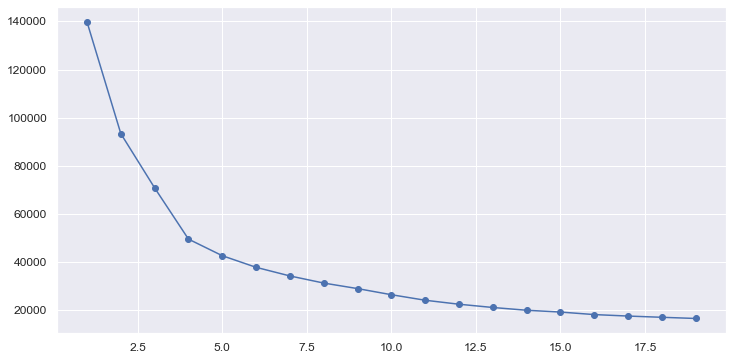

In [226]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

***From above graph we will find elbow range. here it is 4,5 ***

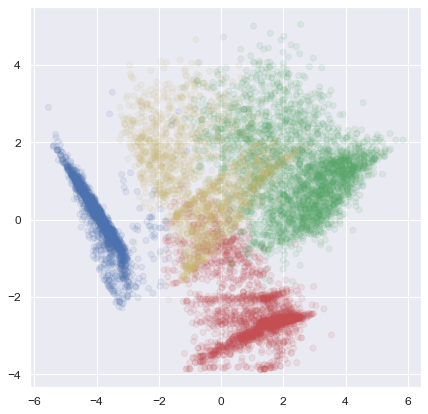

In [227]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.1)

***It is very difficult to draw iddividual plot for cluster, so we will use pair plot which will provide us all graph in one shot. To do that we need to take following steps***

In [228]:
df_pair_plot=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(6)])

In [229]:
df_pair_plot['Cluster']=km_4.labels_ #Add cluster column in the data frame

In [230]:
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,Cluster
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755,0
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463,1
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932,3
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986,3
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214,3


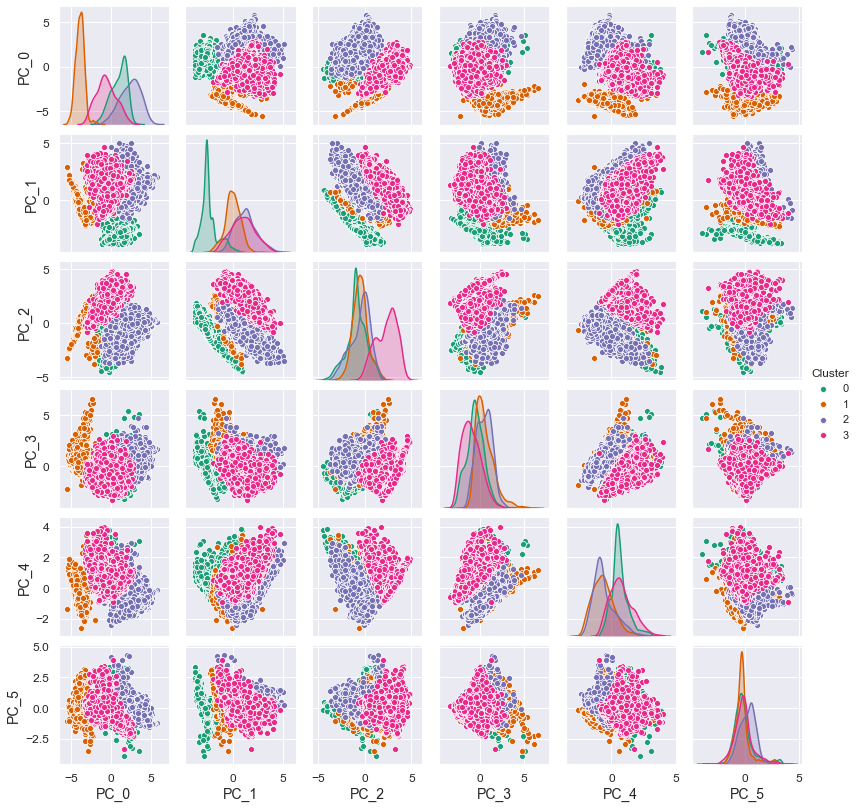

In [231]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

***It shows that first two components are able to indentify clusters***

#### Now we have done here with priciple component now we need to come bring our original data frame and we will merge the cluster with them. 

***To interprate result we need to use our data frame***

In [232]:
# Key performace variable selection . here i am taking varibales which we will use in derving new KPI. 
#We can take all 17 variables but it will be difficult to interprate.So are are selecting less no of variables.

col_kpi=['PURCHASES_TRX','MONTHLY_AVG_PURCHASE','MONTHLY_CASH_ADVANCE','LIMIT_USAGE','CASH_ADVANCE_TRX',
         'PAYMENT_MINPAY','BOTH_ONEOFF_INSTALLMENTS','INSTALLMENTS','ONEOFF','NONE','CREDIT_LIMIT']

In [233]:
cr_pre.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PAYMENT_MINPAY
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.357600
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.648817
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.109459
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.953415
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767


In [234]:
# Conactenating labels found through Kmeans with data 
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [235]:
cluster_df_4.head()

,PURCHASES_TRX,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,CASH_ADVANCE_TRX,PAYMENT_MINPAY,BOTH_ONEOFF_INSTALLMENTS,INSTALLMENTS,ONEOFF,NONE,CREDIT_LIMIT,Cluster_4
0,2.0,7.950000,0.000000,0.040901,0.0,1.446508,0,1,0,0,1000.0,0
1,0.0,0.000000,536.912124,0.457495,4.0,3.826241,0,0,0,1,7000.0,1
2,12.0,64.430833,0.000000,0.332687,0.0,0.991682,0,0,1,0,7500.0,3
3,1.0,124.916667,17.149001,0.222223,1.0,0.000000,0,0,1,0,7500.0,3
4,1.0,1.333333,0.000000,0.681429,0.0,2.771075,0,0,1,0,1200.0,3


In [236]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,12.062050,0.043582,33.013723,7.127341
MONTHLY_AVG_PURCHASE,47.626256,0.148297,193.008043,69.875917
MONTHLY_CASH_ADVANCE,33.550080,186.281319,67.466910,78.098613
LIMIT_USAGE,0.264745,0.576076,0.353591,0.379761
CASH_ADVANCE_TRX,1.021133,6.540230,2.804261,2.881220
PAYMENT_MINPAY,13.422420,9.936617,7.245651,5.573672
BOTH_ONEOFF_INSTALLMENTS,0.000000,0.001916,1.000000,0.000535
INSTALLMENTS,1.000000,0.017241,0.000000,0.000000
ONEOFF,0.000000,0.002874,0.000000,0.999465
NONE,0.000000,0.977969,0.000000,0.000000


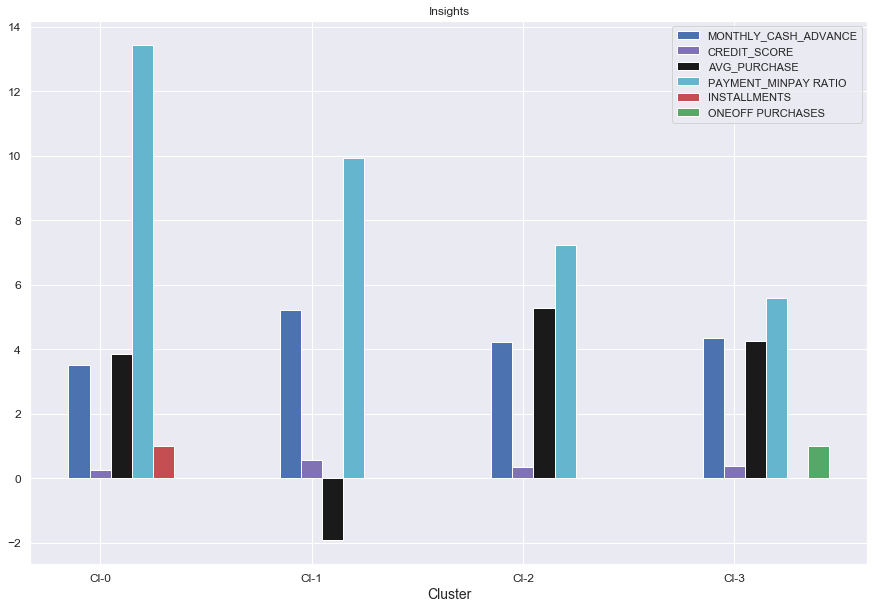

In [237]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['MONTHLY_CASH_ADVANCE',:].values)
credit_score=(cluster_4.loc['LIMIT_USAGE',:].values)
purchase= np.log(cluster_4.loc['MONTHLY_AVG_PURCHASE',:].values)
payment=cluster_4.loc['PAYMENT_MINPAY',:].values
installment=cluster_4.loc['INSTALLMENTS',:].values
one_off=cluster_4.loc['ONEOFF',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='MONTHLY_CASH_ADVANCE',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='CREDIT_SCORE',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='AVG_PURCHASE',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='PAYMENT_MINPAY RATIO',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='INSTALLMENTS',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='ONEOFF PURCHASES',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

**Insights**

#### Clusters are clearly distinguishing behavior within customers




<big>

- Cluster 3 customers are doing maximum One_Off purchases  and  least payment ratio. *** This group is about 21% of the total customer base ***
 
    
- Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good credit score. *** This group is about 31% of the total customer base ***
 

 
- cluster 1 is taking maximum advance_cash  and  is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. *** This group is about 23% of the total customer base ***



- Cluster 0 customers have maximum credit score and are paying dues and are doing maximum installment purchases. *** This group is about 25% of the total customer base ***


---



In [238]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s),'\n'

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 "),'\n'
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

Cluster_4   
0          0    2224
1          1    2088
2          2    2769
3          3    1869
Name: Cluster_4, dtype: int64
Cluster -4 
   Size  Percentage
0  2224   24.849162
1  2088   23.329609
2  2769   30.938547
3  1869   20.882682


#### Finding behaviour with 5 Clusters:

In [239]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_cr)
km_5.labels_

array([3, 0, 1, 1, 1, 3, 2, 3, 2, 1, 3, 1, 2, 2, 0, 3, 0, 3, 2, 3, 3, 4,
       3, 4, 0, 3, 1, 3, 4, 3, 4, 2, 1, 1, 3, 0, 0, 4, 1, 1, 0, 4, 1, 0,
       2, 4, 3, 0, 2, 1, 4, 2, 0, 1, 3, 1, 1, 2, 0, 3, 1, 1, 0, 1, 3, 2,
       0, 0, 2, 1, 3, 4, 0, 2, 2, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 1, 4, 4,
       1, 0, 4, 4, 1, 1, 1, 0, 1, 0, 3, 0, 1, 3, 2, 3, 0, 1, 3, 0, 4, 4,
       2, 0, 4, 0, 2, 2, 3, 0, 3, 0, 4, 1, 3, 0, 0, 1, 0, 2, 1, 0, 1, 2,
       3, 1, 3, 2, 2, 4, 2, 1, 2, 0, 0, 2, 2, 1, 3, 1, 2, 2, 3, 2, 3, 4,
       2, 3, 4, 0, 2, 1, 0, 0, 2, 2, 3, 0, 3, 2, 3, 2, 0, 4, 3, 0, 4, 0,
       1, 0, 2, 3, 2, 3, 4, 1, 2, 3, 3, 2, 1, 1, 1, 1, 1, 3, 1, 2, 2, 2,
       1, 0, 1, 4, 3, 4, 2, 3, 1, 4, 4, 2, 4, 2, 0, 1, 3, 3, 4, 2, 4, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 3, 1, 1, 2, 1, 3, 2, 3, 2, 1, 2,
       2, 1, 2, 3, 2, 3, 4, 2, 1, 3, 3, 1, 0, 3, 1, 4, 3, 0, 1, 2, 2, 4,
       2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 4, 1, 1, 1, 3, 2, 2, 3, 2, 2, 0, 0,
       0, 4, 1, 0, 2, 4, 1, 0, 3, 2, 1, 0, 1, 1, 1,

In [240]:
pd.Series(km_5.labels_).value_counts()

3    2149
0    2081
2    1977
1    1862
4     881
dtype: int64

Text(0, 0.5, 'PC_1')

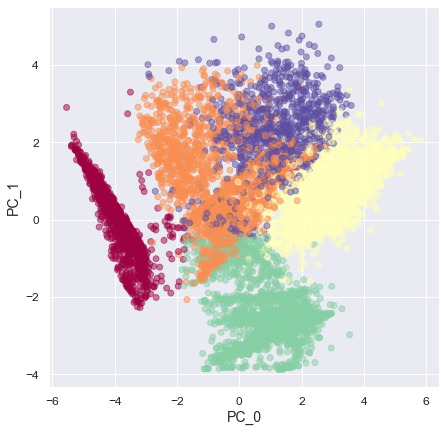

In [241]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [242]:
cluster_df_5=pd.concat([cre_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [243]:
# Finding Mean of features for each cluster
cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T

Cluster_5,0,1,2,3,4
PURCHASES_TRX,0.032196,7.096670,34.587759,11.905537,27.703746
MONTHLY_AVG_PURCHASE,0.086126,68.917645,210.536468,47.369817,141.584086
MONTHLY_CASH_ADVANCE,185.038534,74.517541,4.040708,20.636870,249.942101
LIMIT_USAGE,0.576110,0.377959,0.258931,0.250011,0.600096
CASH_ADVANCE_TRX,6.448823,2.697637,0.152757,0.550489,10.384790
PAYMENT_MINPAY,9.963172,5.562287,8.675499,13.783426,3.651686
BOTH_ONEOFF_INSTALLMENTS,0.000000,0.002148,1.000000,0.000000,0.900114
INSTALLMENTS,0.015858,0.000000,0.000000,1.000000,0.088536
ONEOFF,0.002883,0.997852,0.000000,0.000000,0.011351
NONE,0.981259,0.000000,0.000000,0.000000,0.000000


### Conclusion With 5 clusters : 

- we have a group of customers cluster 3 having highest avergae purchases but there is Cluster 5 also having highest cash advance & second highest purchase behaviour but their type of purchases are same.



---
 
<big>

***So we don't have quite distinguishable characteristics with 5 clusters,***

In [244]:
s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print (s1)

Cluster_5   
0          0    2081
1          1    1862
2          2    1977
3          3    2149
4          4     881
Name: Cluster_5, dtype: int64


In [245]:
# percentage of each cluster

print ("Cluster-5"),'\n'
per_5=pd.Series((s1.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
print (pd.concat([pd.Series(s1.values,name='Size'),per_5],axis=1))

Cluster-5
   Size  Percentage
0  2081   23.251397
1  1862   20.804469
2  1977   22.089385
3  2149   24.011173
4   881    9.843575



### Checking performance metrics for Kmeans
- I am validating performance with 2 metrics Calinski harabaz and Silhouette score

In [246]:
from sklearn.metrics import calinski_harabaz_score,silhouette_score

In [247]:
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_cr)
    score_c[n]=calinski_harabaz_score(reduced_cr,km_score.labels_)
    score[n]=silhouette_score(reduced_cr,km_score.labels_)

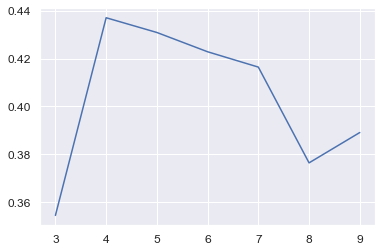

In [248]:
pd.Series(score).plot()

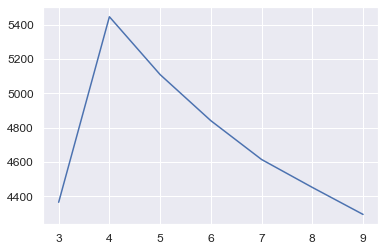

In [130]:
pd.Series(score_c).plot()

**Performance metrics also suggest that  K-means with 4 cluster is able to show distinguished characteristics of each cluster.**




***Insights with 4 Clusters***



- Cluster 3 customers are doing maximum One_Off purchases  and  least payment ratio. *** This group is about 21% of the total customer base ***
 
    
- Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good credit score. *** This group is about 31% of the total customer base ***
 

 
- cluster 1 is taking maximum advance_cash  and  is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. *** This group is about 23% of the total customer base ***



- Cluster 0 customers have maximum credit score and are paying dues and are doing maximum installment purchases. *** This group is about 25% of the total customer base ***




### Marketing Strategy Suggested:

#### A Group 3
   - This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only). This group seems to be risky group.

#### B Group 2    
   - They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score )
       --    we can increase credit limit or can lower down interest rate
       --    Can be given premium card /loyality cards to increase transactions
       
#### C Group 1
   - They have poor credit score and taking only cash on advance. We can target them by providing  less interest rate on purchase transaction
   
####  D Group 0
  - This group is performing best among all as cutomers are maintaining good credit score and paying dues on time.
      -- Giving rewards point will make them perform more purchases.
       